<a href="https://colab.research.google.com/github/Ahmed-ElGammaz/Featue-Engineering-Case_Study/blob/main/kiva_case_study_v_01_12112021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [16]:
df_kiva = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_sets/kiva_loans.csv")
df_kiva.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
df_kiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [5]:
df_kiva.describe().round()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,671205.0,671205.0,671205.0,657698.0,671205.0,671205.0
mean,993249.0,786.0,842.0,178.0,14.0,21.0
std,196611.0,1130.0,1199.0,94.0,9.0,28.0
min,653047.0,0.0,25.0,9.0,1.0,0.0
25%,823072.0,250.0,275.0,126.0,8.0,7.0
50%,992780.0,450.0,500.0,145.0,13.0,13.0
75%,1163653.0,900.0,1000.0,204.0,14.0,24.0
max,1340339.0,100000.0,100000.0,536.0,158.0,2986.0


In [6]:
df_kiva.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [8]:
df_kiva["borrower_genders"].value_counts()

female                                                                                                                                                                                                                                                                                                                                                                        426502
male                                                                                                                                                                                                                                                                                                                                                                          134710
female, female                                                                                                                                                                                                                                                

In [17]:
df_kiva_new = df_kiva[["funded_amount","loan_amount","activity","activity","sector","country",
                  "region","currency", "lender_count", "borrower_genders", "repayment_interval"]]

In [25]:
df_kiva_new.head()

,funded_amount,loan_amount,activity,activity,sector,country,region,currency,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Fruits & Vegetables,Food,Pakistan,Lahore,PKR,12,female,irregular
1,575.0,575.0,Rickshaw,Rickshaw,Transportation,Pakistan,Lahore,PKR,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,Transportation,India,Maynaguri,INR,6,female,bullet
3,200.0,200.0,Embroidery,Embroidery,Arts,Pakistan,Lahore,PKR,8,female,irregular
4,400.0,400.0,Milk Sales,Milk Sales,Food,Pakistan,Abdul Hakeem,PKR,16,female,monthly


In [23]:
for i in df_kiva_new.columns:
  print(i)

funded_amount
loan_amount
activity
activity
sector
country
region
currency
lender_count
borrower_genders
repayment_interval


In [22]:
for i in df_kiva_new.columns:
  from sklearn.impute import MissingIndicator
  miss = MissingIndicator()
  df_kiva_new[miss.fit_transform(df_kiva_new[i])]

ValueError: ignored

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f4de2d310>,
      dtype=object)

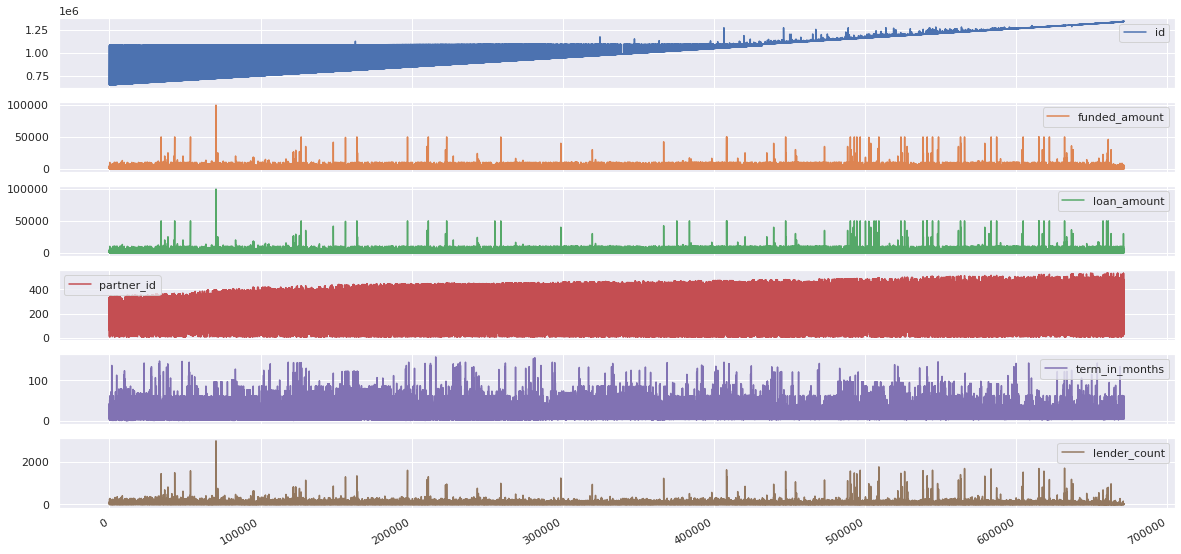

In [24]:
df_kiva.plot(subplots=True, figsize=(20,10))


In [26]:
q1 = df_kiva_new["funded_amount"].quantile(.25)
q3 = df_kiva_new["funded_amount"].quantile(.75)
iqr = q3 - q1
min_out = q1 -1.5 * iqr
max_out = q3 + 1.5 * iqr

In [27]:
min_out

-725.0

In [28]:
max_out

1875.0

In [29]:
df_kiva_new["funded_amount"].max()

100000.0

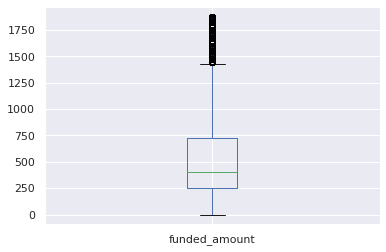

In [33]:
df_kiva_new[(df_kiva_new["funded_amount"]>= min_out) & (df_kiva_new["funded_amount"]<= max_out)]["funded_amount"].plot.box()

In [ ]:
from sklearn.

In [34]:
df_kiva_new.head()

,funded_amount,loan_amount,activity,activity,sector,country,region,currency,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Fruits & Vegetables,Food,Pakistan,Lahore,PKR,12,female,irregular
1,575.0,575.0,Rickshaw,Rickshaw,Transportation,Pakistan,Lahore,PKR,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,Transportation,India,Maynaguri,INR,6,female,bullet
3,200.0,200.0,Embroidery,Embroidery,Arts,Pakistan,Lahore,PKR,8,female,irregular
4,400.0,400.0,Milk Sales,Milk Sales,Food,Pakistan,Abdul Hakeem,PKR,16,female,monthly


In [36]:
df_kiva_new["sector"].value_counts().count()

15

In [38]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(df_kiva_new[["sector"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [41]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit_transform(df_kiva_new[["sector"]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 6, 13, 13, ...,  5,  0,  0])

In [42]:
pd.Series(enc.fit_transform(df_kiva_new[["sector"]]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0          6
1         13
2         13
3          1
4          6
          ..
671200     0
671201     0
671202     5
671203     0
671204     0
Length: 671205, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


In [43]:
df_kiva_new.head()

,funded_amount,loan_amount,activity,activity,sector,country,region,currency,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Fruits & Vegetables,Food,Pakistan,Lahore,PKR,12,female,irregular
1,575.0,575.0,Rickshaw,Rickshaw,Transportation,Pakistan,Lahore,PKR,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,Transportation,India,Maynaguri,INR,6,female,bullet
3,200.0,200.0,Embroidery,Embroidery,Arts,Pakistan,Lahore,PKR,8,female,irregular
4,400.0,400.0,Milk Sales,Milk Sales,Food,Pakistan,Abdul Hakeem,PKR,16,female,monthly


In [45]:
y = df_kiva_new["repayment_interval"].values

In [49]:
X = df_kiva_new.drop(df_kiva_new["repayment_interval"], axis=1).values

KeyError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)